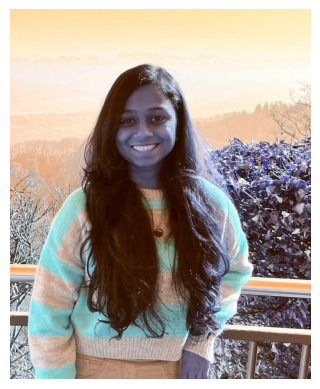

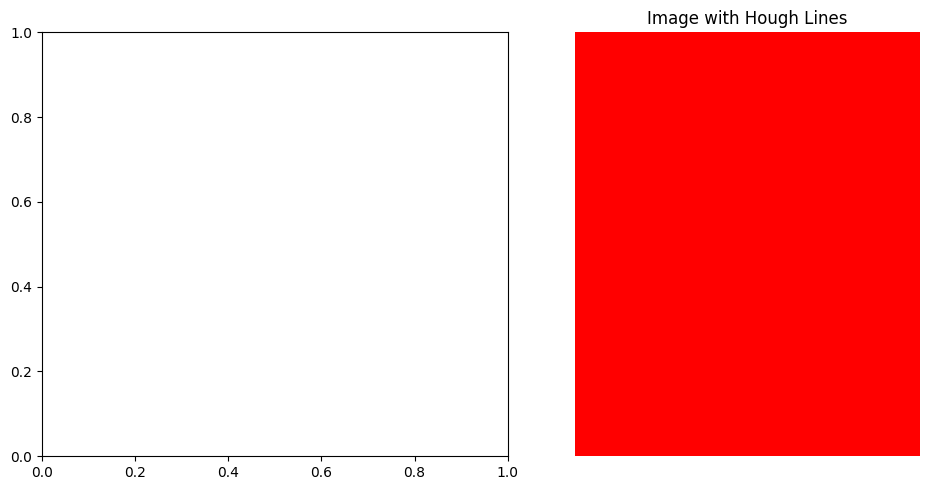

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/Users/manasas/Desktop/Manasa.jpeg')

plt.imshow(image)
plt.axis('off')
plt.show()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, threshold1=50, threshold2=150)

# Apply Hough line transform
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=100)

# Draw detected lines on the image
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Convert BGR to RGB for displaying with matplotlib
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))


# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Plot the image with detected lines in the second subplot
axs[1].imshow(image_rgb)
axs[1].set_title('Image with Hough Lines')
axs[1].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()
